# Victor Manuel Gómez Espinosa


# Librerias y funciones

In [1]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import matplotlib.pyplot as plt

In [13]:
from Formulas_mult import *

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

# 1) Modelo basado en las formulas mas parecidas

In [8]:
train=pd.read_csv('train.csv')
unique_m=pd.read_csv('unique_m.csv')
dfscores=pd.read_excel('dfscores.xlsx', index_col=0)

In [17]:
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [18]:
unique_m.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [20]:
dfscores.head()

,F1,F2,F3,F4,F5,F6,material,tc
0,-0.277439,-0.396983,1.023893,-0.885160,0.227154,0.518104,Ba0.2La1.8Cu1O4,29.0
1,0.405106,-0.211736,1.147992,-0.407267,-0.304637,0.410809,Ba0.1La1.9Ag0.1Cu0.9O4,26.0
2,-0.335691,-0.372040,1.074705,-0.860565,0.236153,0.547390,Ba0.1La1.9Cu1O4,19.0
3,-0.304706,-0.384182,1.048685,-0.873219,0.231333,0.531940,Ba0.15La1.85Cu1O4,22.0
4,-0.231043,-0.424518,0.976609,-0.909750,0.220097,0.493072,Ba0.3La1.7Cu1O4,23.0


In [14]:
# datos para el modelo
y=unique_m #vector de elementos, temp y material
X=dfscores #propiedades

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [16]:
#total
prop_t=X.drop(columns=['tc','material']).values
Elem_t=y.drop(columns=['critical_temp','material']).values
mat_t=y.material.values
temp_t=y.critical_temp.values

#train
prop_train=X_train.drop(columns=['tc','material']).values
Elem_train=y_train.drop(columns=['critical_temp','material']).values
mat_train=y_train.material.values
temp_train=y_train.critical_temp.values

#test
prop_test=X_test.drop(columns=['tc','material']).values
Elem_test=y_test.drop(columns=['critical_temp','material']).values
mat_test=y_test.material.values
temp_test=y_test.critical_temp.values

In [18]:
def queryMatTemp(El_mat,EL_prop,n=5,base=Elem_train,names=mat_train, temp=temp_train, prop=Elem_train):
    El_mat=El_mat.reshape(1,-1)
    ktest=cosine_similarity(base,El_mat)
    
    dft=pd.DataFrame(prop)
    dft.index=names
    dft['tc']=temp
    dft['test']=ktest
    fnames=dft.nlargest(n,'test') #ordena y muestra los 5 mas importantes
    #fnames=dft[dft.test>0.99]
    X_data=fnames.drop(columns=['tc','test']).values
    y_data=fnames.tc.values
    y_data=y_data.reshape(-1,1)
    X=EL_prop
    X=X.reshape(1,-1)
    
    # modelo y prediccion
    reg=LinearRegression()
    reg.fit(X_data,y_data)
    y_pred=reg.predict(X)
    return(y_pred[0][0])

In [21]:
ELprop=X_test.loc[19191].values[0:-2]
ELprop

array([-0.1308840845674809, 0.2410456303031157, 0.29770203167039,
       -0.2097725083618674, 0.003026872704675297, -1.53497453748666],
      dtype=object)

In [22]:
el=y_test.loc[19191]
el

H                            0
He                           0
Li                           0
Be                           0
B                            0
                     ...      
Po                           0
At                           0
Rn                           0
critical_temp             29.2
material         Cs0.8Fe1.7Se2
Name: 19191, Length: 88, dtype: object

In [23]:
ELMat=y_test.loc[19191].values[0:-2]
ELMat

array([0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.8, 0.0,
       0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0,
       0, 0], dtype=object)

In [25]:

y_pred=queryMatTemp(ELMat,ELprop,n=50,base=Elem_train,names=mat_train, temp=temp_train, prop=prop_train)
y_pred

29.69745615889068

In [26]:
y_obs=y_test.loc[19191].values[-2]

In [27]:
print(y_obs,y_pred)

29.2 29.69745615889068


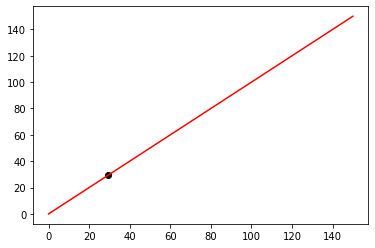

In [28]:
# Figura 8
xl=[0,150]
yl=[0,150]
#plt.figure(figsize = (15,10))
plt.plot(xl,yl, color='red')
plt.scatter(y_obs,y_pred,color='black')
plt.show()

colinealidad y muchas variables no son significativas

por elementos lo hace muy bien

# para todo el conjunto de prueba...

In [29]:
from datetime import datetime
startTime = datetime.now()
n,_=Elem_t.shape

t_pl=[]
for i in range(n):
    y_pred=queryMatTemp(Elem_t[i,:],prop_t[i,:],n=50,base=Elem_train,names=mat_train, temp=temp_train, prop=prop_train)
    t_pl.append(y_pred)

y_predV=np.array(t_pl)
print(datetime.now() - startTime)

0:08:11.209409


In [38]:
y_obs=temp_t.reshape(-1,1)
y_predV=y_predV.reshape(-1,1)

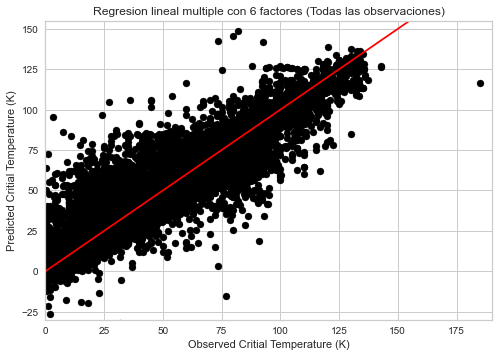

In [39]:
# Figura 8
xl=[0,200]
yl=[0,200]
#plt.figure(figsize = (15,10))
plt.plot(xl,yl, color='red')
plt.scatter(y_obs,y_predV,color='black')
plt.xlim([0,190])
plt.ylim([-30,155])
plt.xlabel('Observed Critial Temperature (K)'), plt.ylabel('Predicted Critial Temperature (K)'), plt.title('Regresion lineal multiple con 6 factores (Todas las observaciones)')
plt.show()

In [40]:
r2=round(r2_score(y_obs,y_predV),3)
rmse = np.sqrt(mean_squared_error(y_obs,y_predV))
print('r2: ',r2)
print()
print('rmse: ', rmse)

r2:  -1.0736958892383127e+18

rmse:  35493295206.197365


In [41]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_obs,y_predV)

2.6194570368704433

In [42]:
resultadoModelo=pd.DataFrame(y_obs)
resultadoModelo.columns=['Observed_Crit_Temp']
resultadoModelo['Predicted_Crit_Temp']=y_predV
resultadoModelo['Material']=mat_t

In [43]:
resultadoModelo.to_excel("resultadoModelo.xlsx")